In [9]:
import numpy as np
from astropy import units as u, constants
from astropy.modeling.models import Gaussian1D
from astropy import visualization
from astropy.modeling.fitting import LevMarLSQFitter
fitter = LevMarLSQFitter()

import glob
from astropy.io import fits

from astroplan import Observer
from astropy import units as u, coordinates
from astropy.table import Table
import datetime
import pytz
tz = pytz.timezone('US/Eastern')

%matplotlib inline
import pylab as plt
plt.rcParams['image.origin'] = 'lower'
plt.style.use('dark_background')
visualization.quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x1f48f064308>

In [2]:
list_of_filenames = glob.glob(f'new_data/drift_scan/*.fits')
nfiles = len(list_of_filenames)
waterfall = np.zeros([2048, nfiles])
for ii,filename in enumerate(list_of_filenames):
    tbl = Table.read(filename)
    waterfall[:,ii] = tbl['fsw_pow']

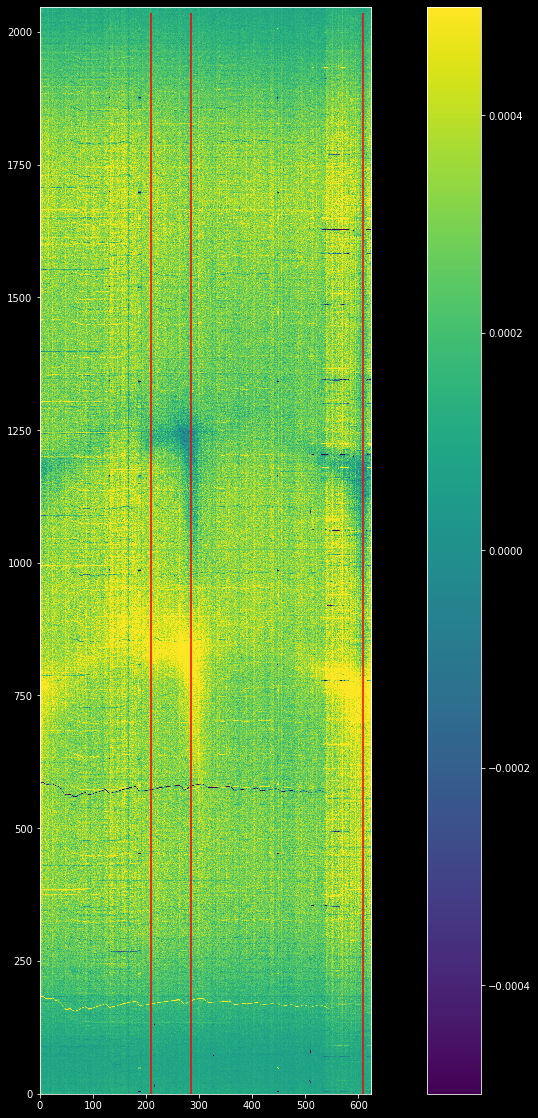

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(waterfall, vmin=-0.0005, vmax=0.0005)
plt.vlines([210, 285, 608], 0, 2035, color='r')
plt.colorbar()

In [11]:
observations = [list_of_filenames[210], list_of_filenames[285], list_of_filenames[608]]
observations

['new_data/drift_scan\\psd_200927_013334_tint60s_sdr0_fswscience.fits',
 'new_data/drift_scan\\psd_200927_042019_tint60s_sdr0_fswscience.fits',
 'new_data/drift_scan\\psd_200927_163621_tint60s_sdr0_fswscience.fits']

In [12]:
%run calculations.py

<Figure size 432x288 with 0 Axes>

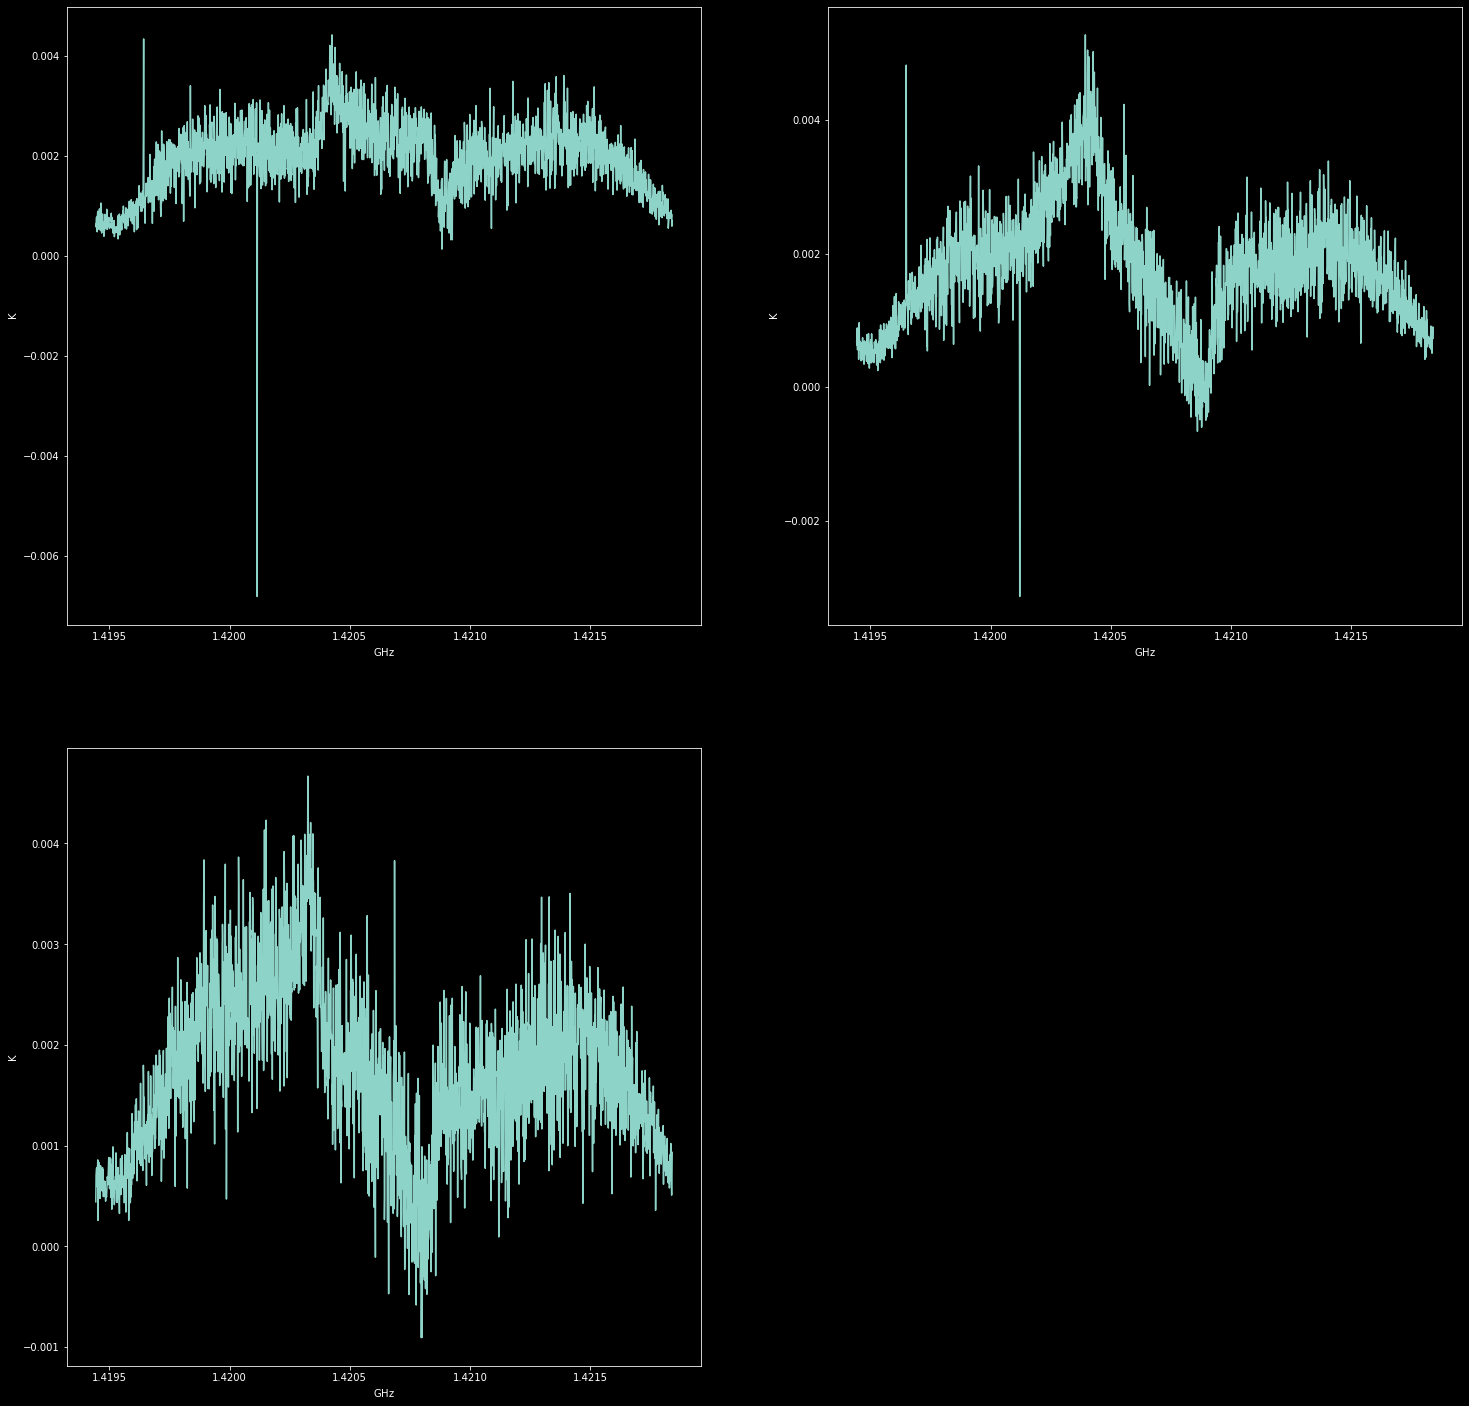

In [13]:
tables, fsw_pow, frq1 = viewer(observations)

In [7]:
selection0 = ((frq1[0] > 1420.20 * u.MHz) &
             (frq1[0] < 1420.62*u.MHz))
selection1 = ((frq1[1] > 1420.20 * u.MHz) &
             (frq1[1] < 1420.62*u.MHz))
selection2 = ((frq1[2] > 1420.09 * u.MHz) &
             (frq1[2] < 1420.11*u.MHz))
selection = [selection0, selection1, selection2]

In [8]:
LOS_velocity, Amplitude, Width, Velocity_err = velocity_function(tables=tables, fsw_pow=fsw_pow, frq1=frq1, selection=selection)

In [9]:
mass_solar, observed_vlsr, our_velocity = mass_function(tables=tables, observed_line_of_sight_velocity=LOS_velocity)

In [10]:
LOS_velocity

[<Quantity -11204.36684444 m / s>,
 <Quantity 5792.43286356 m / s>,
 <Quantity 64819.50015659 m / s>]

In [11]:
Amplitude

['Peak is 0.0028992474600764906 +/- 4.222401935353283e-05 1 / K',
 'Peak is 0.003623004815707408 +/- 4.337870820382615e-05 1 / K',
 'Peak is 0.002715041323403369 +/- 0.00019967042332974416 1 / K']

In [12]:
Width

['Width is 0.0002439577825042442 +/- 1.3016808368511806e-05 1 / K',
 'Width is 0.00018448227731461135 +/- 5.046107420093439e-06 1 / K',
 'Width is 3.6467119607308055e-05 +/- 8.451004090153348e-05 1 / K']

In [13]:
Velocity_err

['Centroid velocity is -11204.366844443945 m / s +/- 1.5218954257923598 m / (K MHz s)',
 'Centroid velocity is 5792.432863560576 m / s +/- 0.6763268583169538 m / (K MHz s)',
 'Centroid velocity is 64819.50015658943 m / s +/- 3.033912830699007 m / (K MHz s)']

In [14]:
our_velocity

[<Quantity 190.3210502 m / s>,
 <Quantity 18139.7379717 m / s>,
 <Quantity -20433.83683304 m / s>]

In [15]:
observed_vlsr

[<Quantity -14.24132439 km / s>,
 <Quantity 10.57257391 km / s>,
 <Quantity 57.92943771 km / s>]

In [16]:
mass_solar

[<Quantity 3.77580721e+08 solMass>,
 <Quantity -14164562.68481595 solMass>,
 <Quantity 3.01220066e+08 solMass>]